<a href="https://colab.research.google.com/github/TheerthaHari/Implementation-of-ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PART1- CREATE DATA

In [16]:
# importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# divide the dataset into independent and dependent features x-independant y- dependent
x= df.iloc[:,3:13]
y=df.iloc[:,13]

In [19]:
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [20]:
# feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True, dtype=int)
gender=pd.get_dummies(x['Gender'],drop_first=True, dtype=int)

In [21]:
#concatenate these variable with dataframe
x=x.drop(['Geography','Gender'],axis=1,errors='ignore')

In [22]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [25]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#PART 2 - CREATE ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [29]:
#Initialize the ann

classifier=Sequential()

In [31]:
# adding the input layer
classifier.add(Dense(units=11,activation='relu'))
#activation in the next layer is also specified

In [32]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [33]:
#adding the next hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [34]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [45]:
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [46]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [47]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8505 - loss: 0.3708 - val_accuracy: 0.8364 - val_loss: 0.3840
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8524 - loss: 0.3593 - val_accuracy: 0.7970 - val_loss: 0.4353
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8533 - loss: 0.3588 - val_accuracy: 0.8466 - val_loss: 0.3744
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8602 - loss: 0.3556 - val_accuracy: 0.8440 - val_loss: 0.3807
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8550 - loss: 0.3543 - val_accuracy: 0.8402 - val_loss: 0.3767
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8501 - loss: 0.3594 - val_accuracy: 0.8489 - val_loss: 0.3829
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8534 - loss: 0.3570 - val_accuracy: 0.8432 - val_loss: 0.3863
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8498 - loss: 0.3571 - 

In [48]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

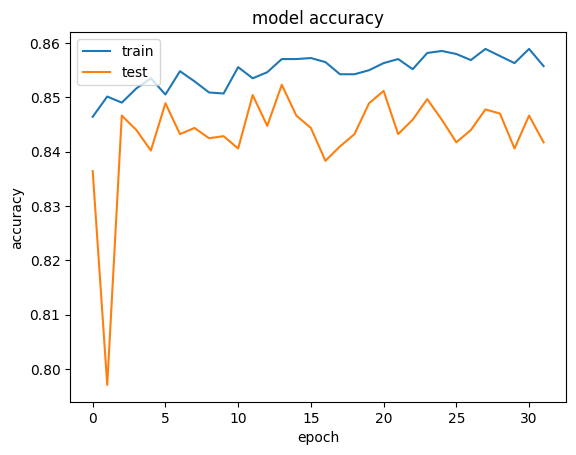

In [49]:
#summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [50]:
#Part3- Making prediction
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [52]:
#confution matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1566,   29],
       [ 261,  144]])

In [53]:
#calculate score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.855